# EDA

In [8]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [9]:
# Get a list of all CSV files in the imdb directory
csv_files = glob.glob('../imdb/train/train*.csv')

# Check if the list is empty
if not csv_files:
    raise ValueError("No CSV files found in the specified directory.")

# Read each CSV file and concatenate them into a single dataframe
train_df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

train_df.head()

,Unnamed: 0,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,numVotes,label
0,4,tt0010600,The Doll,Die Puppe,1919,\N,66,1898.0,True
1,7,tt0011841,Way Down East,Way Down East,1920,\N,145,5376.0,True
2,9,tt0012494,Déstiny,Der müde Tod,1921,\N,97,5842.0,True
3,25,tt0015163,The Navigator,The Navigator,1924,\N,59,9652.0,True
4,38,tt0016220,The Phantom of the Opera,The Phantom of the Opera,1925,\N,93,17887.0,True


In [10]:
print(f'The amount of movies in the data is: {train_df.shape[0]}')

The amount of movies in the data is: 7959


Number of null or empty values in 'startYear': 786
Number of null or empty values in 'endYear': 7173


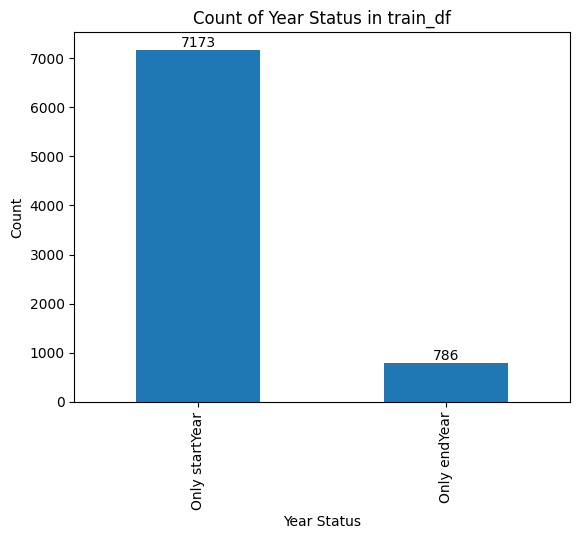

In [11]:
# Create a new column to indicate the status of startYear and endYear
train_df['year_status'] = train_df.apply(lambda row: 'Both' if row['startYear'] != '\\N' and row['endYear'] != '\\N' else 'Only startYear' if row['startYear'] != '\\N' else 'Only endYear' if row['endYear'] != '\\N' else 'None', axis=1)

start_year_null_or_empty = train_df['startYear'].isnull() | (train_df['startYear'] == '\\N')
end_year_null_or_empty = train_df['endYear'].isnull() | (train_df['endYear'] == '\\N')

print(f"Number of null or empty values in 'startYear': {start_year_null_or_empty.sum()}")
print(f"Number of null or empty values in 'endYear': {end_year_null_or_empty.sum()}")


# Plot the results
year_status_counts = train_df['year_status'].value_counts()
ax = year_status_counts.plot(kind='bar')
plt.xlabel('Year Status')
plt.ylabel('Count')
plt.title('Count of Year Status in train_df')

# Add values on top of the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [ ]:
    # Step 6: Create column year from startYear and endYear
train_df['startYear'] = df['startYear'].replace('\\N', np.nan).astype(float)
train_df['endYear'] = df['endYear'].replace('\\N', np.nan).astype(float)
train_df['Year'] = df['startYear'].fillna(train_df['endYear'])

,Unnamed: 0,tconst,primaryTitle,originalTitle,runtimeMinutes,numVotes,label,Year
0,4,tt0010600,The Doll,Die Puppe,66,1898.0,True,1919
1,7,tt0011841,Way Down East,Way Down East,145,5376.0,True,1920
2,9,tt0012494,Déstiny,Der müde Tod,97,5842.0,True,1921
3,25,tt0015163,The Navigator,The Navigator,59,9652.0,True,1924
4,38,tt0016220,The Phantom of the Opera,The Phantom of the Opera,93,17887.0,True,1925


In [13]:
# Check if the 'Year' column has '\N' values
has_n_values = (train_df['Year'] == '\\N').any()
print(f"Does the Year column have '\\N' values? {has_n_values}")


Does the Year column have '\N' values? True


In [14]:
year_min = train_df['Year'].min()
year_max = train_df['Year'].max()
print(f'The range of years is from {year_min} to {year_max}')

The range of years is from 1918 to \N


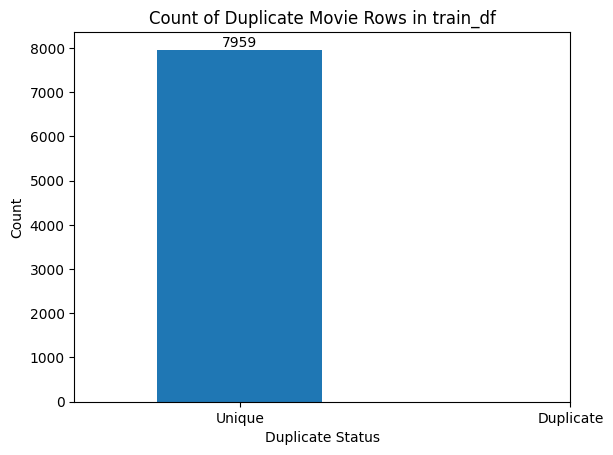

In [15]:
# Check for duplicate rows based on 'tconst' column
duplicate_counts = train_df.duplicated(subset='tconst').value_counts()

# Plot the results
ax = duplicate_counts.plot(kind='bar')
plt.xlabel('Duplicate Status')
plt.ylabel('Count')
plt.title('Count of Duplicate Movie Rows in train_df')
plt.xticks(ticks=[0, 1], labels=['Unique', 'Duplicate'], rotation=0)

# Add values on top of the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [16]:
# Check for duplicate rows based on 'Year', 'runtimeMinutes', and 'numVotes' columns
duplicate_instances = train_df.duplicated(subset=['Year', 'runtimeMinutes', 'numVotes'], keep=False)

# Display the duplicate instances
duplicates_df = train_df[duplicate_instances]
print(duplicates_df)
print(f'The number of duplicate instances based on Year, runtimeMinutes, and numVotes is: {duplicates_df.shape[0]}')

      Unnamed: 0     tconst                       primaryTitle originalTitle  \
299         2988  tt0111666                 Wár ớf thé Búttớns           NaN   
331         3398  tt0126861                             Denial        Denial   
338         3461  tt0139615                               Slam           NaN   
348         3579  tt0166110                              Bones         Bones   
431         4415  tt0353357                       Dáy ớf Wráth           NaN   
...          ...        ...                                ...           ...   
7868        9147  tt5982852                        Jolly LLB 2   Jolly LLB 2   
7915        9664  tt8017136  Tớny: My Méntớr thé Sériál Killér          Tony   
7935        9803  tt8671462                         Invoking 5    Invoking 5   
7936        9806  tt8694228                            Mikhael           NaN   
7943        9884  tt9110170                         Wrong Turn    Wrong Turn   

     runtimeMinutes  numVotes  label  Y

In [17]:
# Check for instances where movies do not contain votes
no_votes_df = train_df[train_df['numVotes'].isnull() | (train_df['numVotes'] == 0)]

# Display the result
print(no_votes_df)
print(f'The number of movies without votes is: {no_votes_df.shape[0]}')

      Unnamed: 0     tconst                       primaryTitle  \
7            118  tt0023973             Thé Éáglé ánd thé Háwk   
8            119  tt0023986                Émplớyéés' Éntráncé   
12           163  tt0027478        The Crime of Monsieur Lange   
13           180  tt0028333                         Swing Timé   
38           466  tt0040626                  My Dear Secretary   
...          ...        ...                                ...   
7899        9446  tt7134096                 The Rhythm Section   
7915        9664  tt8017136  Tớny: My Méntớr thé Sériál Killér   
7935        9803  tt8671462                         Invoking 5   
7936        9806  tt8694228                            Mikhael   
7943        9884  tt9110170                         Wrong Turn   

                   originalTitle runtimeMinutes  numVotes  label  Year  
7                            NaN             73       NaN   True  1933  
8                            NaN             75       NaN   T

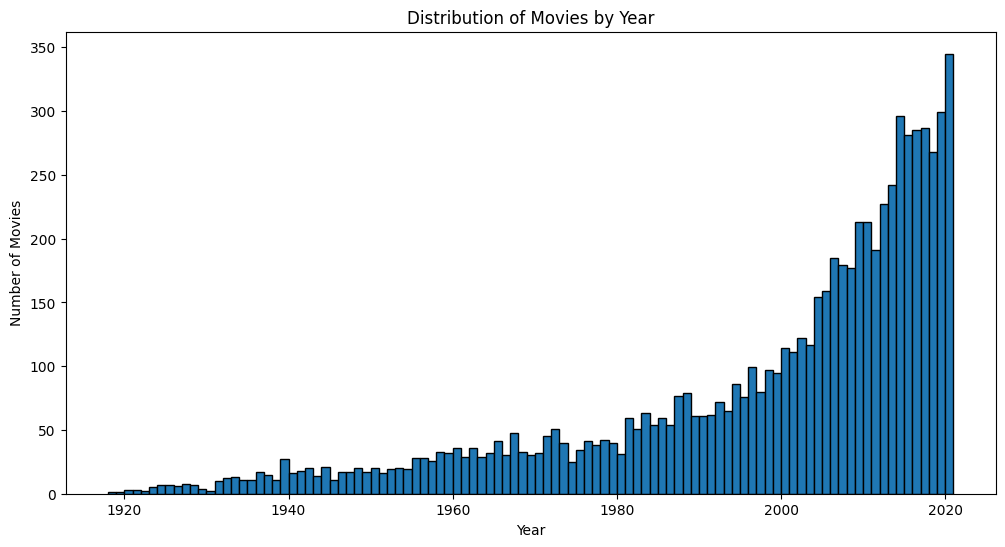

In [18]:
# Convert startYear to numeric, setting errors='coerce' to handle non-numeric values
train_df['Year'] = pd.to_numeric(train_df['Year'], errors='coerce')

# Plot the distribution of movies by start year
plt.figure(figsize=(12, 6))
plt.hist(train_df['Year'].dropna(), bins=range(int(train_df['Year'].min()), int(train_df['Year'].max()) + 1, 1), edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Year')
plt.show()